# Wheat Seed Dataset

# 1: Introduction

The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is a classification problem. The number of observations for each class is balanced. There are 199 observations with 7 input variables and 1 output variable. The variable names are as follows:

<br> 1. Area.
<br> 2. Perimeter.
<br> 3. Compactness
<br> 4. Length of kernel.
<br> 5. Width of kernel.
<br> 6. Asymmetry coefficient.
<br> 7. Length of kernel groove.
<br> 8. Class (1, 2, 3).




# 2: Data Pre processing

## 2.1 Loading the required Libraries

In [ ]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Pytorch Lib
import torch
import random
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F

## 2.2 Get Data

In [ ]:
## Loading the dataset from github repo
url = 'https://raw.githubusercontent.com/hargurjeet/MachineLearning/Wheat-Seeds/seeds.csv'
df = pd.read_csv(url)

df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.shape

(199, 8)

In [ ]:
df.Type.value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

# 3: Preparing the data for ML model

In [ ]:
# this is to update the labels from 1, 2, 3 to 0, 1, 2
def update_values_(df):
  for i in range(len(df)):
    df[i] = df[i] - 1

  return df

## 3.1 Splitting the data in train and validation sets

In [ ]:
# Converting the data to tensors
from torch.utils.data import random_split
import torch
import random
from torch.utils.data import TensorDataset

train_target = torch.tensor(df['Type'].values.astype(np.int64))
train = torch.tensor(df.drop('Type', axis = 1).values.astype(np.float32))


train_tensor = TensorDataset(train, update_values_(train_target))

train_ds, val_ds = random_split(train_tensor, [180, 19])
len(train_ds), len(val_ds)

(180, 19)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
for xb, yb in train_loader:
    print(xb)
    print(yb)
    break

tensor([[14.5200, 14.6000,  0.8557,  5.7410,  3.1130,  1.4810,  5.4870],
        [11.7500, 13.5200,  0.8082,  5.4440,  2.6780,  4.3780,  5.3100],
        [13.3200, 13.9400,  0.8613,  5.5410,  3.0730,  7.0350,  5.4400],
        [12.7800, 13.5700,  0.8716,  5.2620,  3.0260,  1.1760,  4.7820],
        [12.3600, 13.1900,  0.8923,  5.0760,  3.0420,  3.2200,  4.6050],
        [11.1900, 13.0500,  0.8253,  5.2500,  2.6750,  5.8130,  5.2190],
        [12.7600, 13.3800,  0.8964,  5.0730,  3.1550,  2.8280,  4.8300],
        [10.5900, 12.4100,  0.8648,  4.8990,  2.7870,  4.9750,  4.7940],
        [14.0300, 14.1600,  0.8796,  5.4380,  3.2010,  1.7170,  5.0010],
        [15.2600, 14.8400,  0.8710,  5.7630,  3.3120,  2.2210,  5.2200],
        [16.5300, 15.3400,  0.8823,  5.8750,  3.4670,  5.5320,  5.8800],
        [16.4400, 15.2500,  0.8880,  5.8840,  3.5050,  1.9690,  5.5330],
        [13.5400, 13.8500,  0.8871,  5.3480,  3.1560,  2.5870,  5.1780],
        [11.2700, 12.8600,  0.8563,  5.0910,  2.804

In [ ]:
train_tensor[0:3]

(tensor([[15.2600, 14.8400,  0.8710,  5.7630,  3.3120,  2.2210,  5.2200],
         [14.8800, 14.5700,  0.8811,  5.5540,  3.3330,  1.0180,  4.9560],
         [14.2900, 14.0900,  0.9050,  5.2910,  3.3370,  2.6990,  4.8250]]),
 tensor([0, 0, 0]))

# 4: Building the ML Model

## 4.1 nn.Linear Model

In [ ]:
import torch.nn as nn

input_size = 7*1
num_classes = 3

model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
print(model.bias.shape)

torch.Size([3, 7])
torch.Size([3])


In [ ]:
class SeedModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 7)
        out = self.linear(xb)
        return out
    
model = SeedModel()

In [ ]:
model.linear

Linear(in_features=7, out_features=3, bias=True)

In [ ]:
for inputs, labels in train_loader:
    print(inputs.shape)
    outputs = model(inputs)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([64, 7])
outputs.shape :  torch.Size([64, 3])
Sample outputs :
 tensor([[ 6.7912, -8.6281,  3.9822],
        [ 6.4161, -8.5757,  4.4213]])


## 4.2 Applying Softmax

In [ ]:
import torch.nn.functional as F

In [ ]:
outputs[:2]

tensor([[ 6.7912, -8.6281,  3.9822],
        [ 6.4161, -8.5757,  4.4213]], grad_fn=<SliceBackward>)

In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[9.4316e-01, 1.8970e-07, 5.6841e-02],
        [8.8025e-01, 2.7147e-07, 1.1975e-01]])
Sum:  0.9999999403953552


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0.9432, 0.8802, 0.9532, 0.8272, 0.9148, 0.9047, 0.9398, 0.9173, 0.9159,
        0.9552, 0.9296, 0.9105, 0.8723, 0.9403, 0.8928, 0.9526, 0.9444, 0.8924,
        0.8944, 0.9581, 0.9308, 0.9315, 0.8378, 0.8949, 0.9605, 0.8998, 0.8534,
        0.9559, 0.9534, 0.8847, 0.9094, 0.9714, 0.8728, 0.8229, 0.8399, 0.8787,
        0.9750, 0.9507, 0.9103, 0.9148, 0.9585, 0.9083, 0.9515, 0.9448, 0.9578,
        0.9533, 0.8812, 0.8675, 0.9559, 0.9412, 0.9257, 0.9374, 0.8698, 0.8828,
        0.8578, 0.8176, 0.9636, 0.9384, 0.9535, 0.9113, 0.8604, 0.9376, 0.9290,
        0.9640], grad_fn=<MaxBackward0>)


In [ ]:
labels

tensor([1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0,
        2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1,
        2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2])

## 4.3 Evaluation Metric and Loss Function

In [ ]:
torch.sum(preds == labels)

tensor(23)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.3594)

In [ ]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(5.1648, grad_fn=<NllLossBackward>)


## 4.4 Training the model

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class SeedModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 7)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = SeedModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.2631579041481018, 'val_loss': 6.478029727935791}

In [ ]:
history1 = fit(5, 0.004, model, train_loader, val_loader)

Epoch [0], val_loss: 3.6313, val_acc: 0.3684
Epoch [1], val_loss: 2.4880, val_acc: 0.4211
Epoch [2], val_loss: 1.4502, val_acc: 0.3684
Epoch [3], val_loss: 1.0939, val_acc: 0.4211
Epoch [4], val_loss: 1.0728, val_acc: 0.3684


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0636, val_acc: 0.5263
Epoch [1], val_loss: 1.0558, val_acc: 0.5789
Epoch [2], val_loss: 1.0542, val_acc: 0.5789
Epoch [3], val_loss: 1.0505, val_acc: 0.5789
Epoch [4], val_loss: 1.0487, val_acc: 0.5789


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0486, val_acc: 0.5789
Epoch [1], val_loss: 1.0462, val_acc: 0.5789
Epoch [2], val_loss: 1.0486, val_acc: 0.5789
Epoch [3], val_loss: 1.0440, val_acc: 0.5789
Epoch [4], val_loss: 1.0432, val_acc: 0.5789


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0399, val_acc: 0.5789
Epoch [1], val_loss: 1.0393, val_acc: 0.5789
Epoch [2], val_loss: 1.0366, val_acc: 0.5789
Epoch [3], val_loss: 1.0356, val_acc: 0.5789
Epoch [4], val_loss: 1.0343, val_acc: 0.5789


## 4.5 Model accuracy

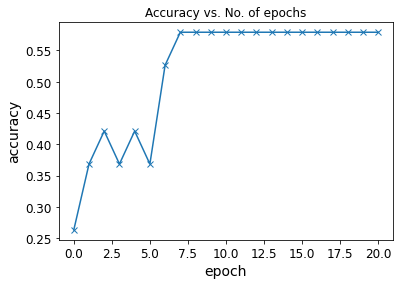

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');